In [19]:
import os
import re
import time
import pandas as pd
import numpy as np
import json
from tqdm import tqdm
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(
    r""
)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49341 entries, 0 to 49340
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  49341 non-null  object 
 1   ISBN        49340 non-null  float64
 2   분류          48549 non-null  object 
 3   제목          49340 non-null  object 
 4   부제          32777 non-null  object 
 5   저자          49340 non-null  object 
 6   발행자         49340 non-null  object 
 7   발행일         49340 non-null  object 
 8   페이지         49340 non-null  float64
 9   가격          49340 non-null  float64
 10  표지          49340 non-null  object 
 11  책소개         48741 non-null  object 
 12  저자소개        37529 non-null  object 
 13  목차          45817 non-null  object 
 14  출판사리뷰       28964 non-null  object 
 15  추천사         521 non-null    object 
dtypes: float64(3), object(13)
memory usage: 6.0+ MB


C:\Users\computer\AppData\Local\Temp\ipykernel_31552\362337839.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Kill_the_RAG\Project\Aiffel_final_project\Code\Data\aiffel_book_final.csv")


In [ ]:
# df = df.drop(columns=["Unnamed: 0"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49341 entries, 0 to 49340
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ISBN    49340 non-null  float64
 1   분류      48549 non-null  object 
 2   제목      49340 non-null  object 
 3   부제      32777 non-null  object 
 4   저자      49340 non-null  object 
 5   발행자     49340 non-null  object 
 6   발행일     49340 non-null  object 
 7   페이지     49340 non-null  float64
 8   가격      49340 non-null  float64
 9   표지      49340 non-null  object 
 10  책소개     48741 non-null  object 
 11  저자소개    37529 non-null  object 
 12  목차      45817 non-null  object 
 13  출판사리뷰   28964 non-null  object 
 14  추천사     521 non-null    object 
dtypes: float64(3), object(12)
memory usage: 5.6+ MB


#### 길이

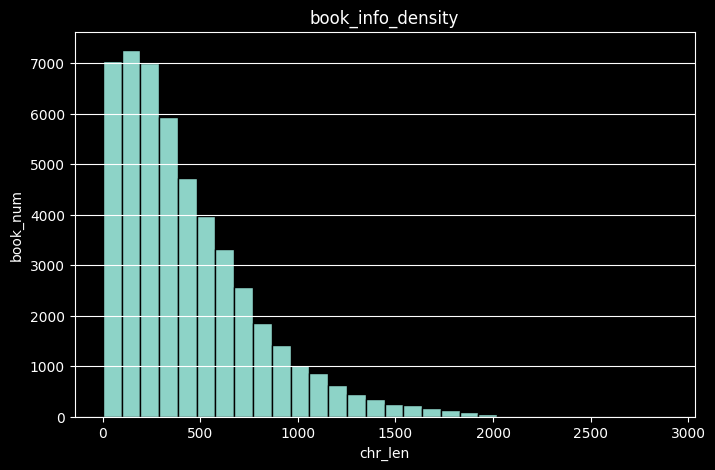

6


In [ ]:
### 책소개
plt.figure(figsize=(8, 5))


plt.hist(
    df["책소개"].apply(lambda x: len(str(x)) if pd.notna(x) else 0).dropna(),
    bins=30,
    edgecolor="black",
)


plt.title("book_info_density")


plt.xlabel("chr_len")


plt.ylabel("book_num")


plt.grid(axis="y")


plt.show()

print(
    df[df["책소개"].apply(lambda x: len(str(x)) if pd.notna(x) else 0) > 2000].shape[0]
)

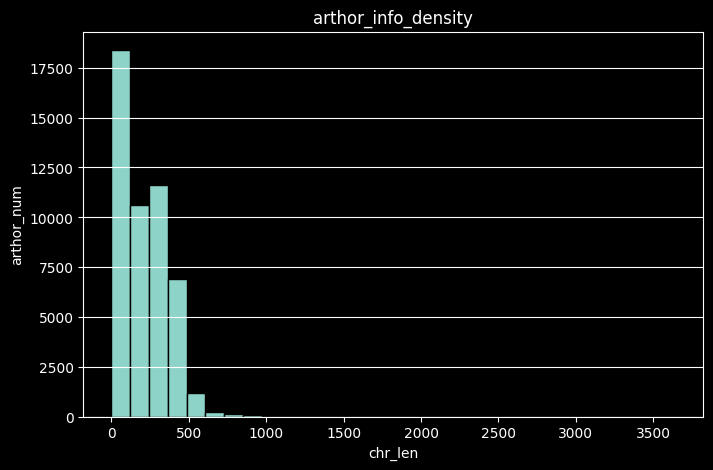

1095


In [ ]:
### 저자소개
plt.figure(figsize=(8, 5))

plt.hist(
    df["저자소개"].apply(lambda x: len(str(x)) if pd.notna(x) else 0).dropna(),
    bins=30,
    edgecolor="black",
)


plt.title("arthor_info_density")


plt.xlabel("chr_len")


plt.ylabel("arthor_num")


plt.grid(axis="y")


plt.show()

print(
    df[df["저자소개"].apply(lambda x: len(str(x)) if pd.notna(x) else 0) > 500].shape[0]
)

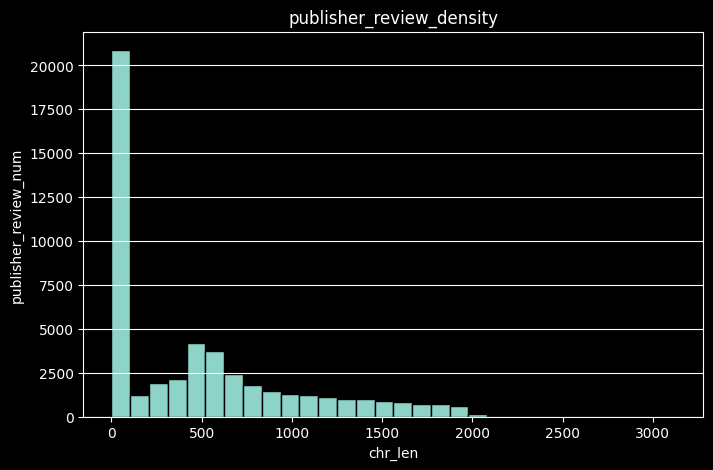

52


In [ ]:
### 출판사리뷰
plt.figure(figsize=(8, 5))

plt.hist(
    df["출판사리뷰"].apply(lambda x: len(str(x)) if pd.notna(x) else 0).dropna(),
    bins=30,
    edgecolor="black",
)


plt.title("publisher_review_density")


plt.xlabel("chr_len")


plt.ylabel("publisher_review_num")


plt.grid(axis="y")


plt.show()

print(
    df[
        df["출판사리뷰"].apply(lambda x: len(str(x)) if pd.notna(x) else 0) > 2000
    ].shape[0]
)

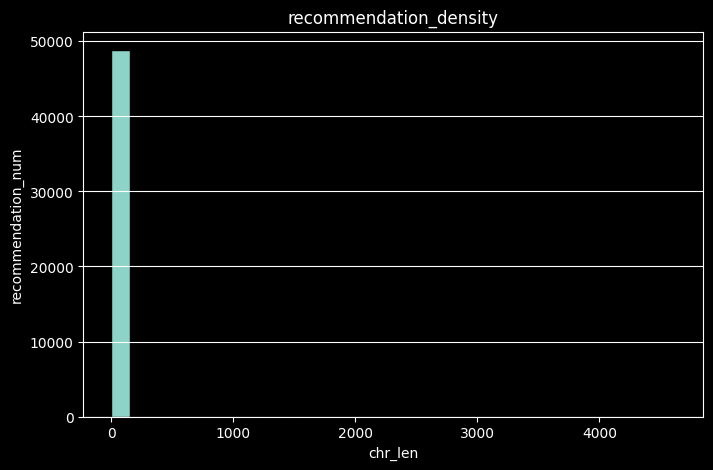

25


In [ ]:
### 추천사
plt.figure(figsize=(8, 5))


plt.hist(
    df["추천사"].apply(lambda x: len(str(x)) if pd.notna(x) else 0).dropna(),
    bins=30,
    edgecolor="black",
)


plt.title("recommendation_density")


plt.xlabel("chr_len")


plt.ylabel("recommendation_num")


plt.grid(axis="y")


plt.show()

print(
    df[df["추천사"].apply(lambda x: len(str(x)) if pd.notna(x) else 0) > 2000].shape[0]
)

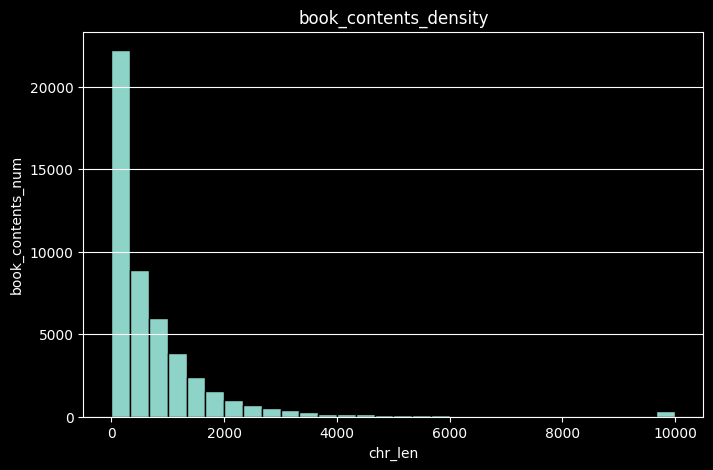

4436


In [ ]:
### 목차
plt.figure(figsize=(8, 5))


plt.hist(
    df["목차"].apply(lambda x: len(str(x)) if pd.notna(x) else 0).dropna(),
    bins=30,
    edgecolor="black",
)


plt.title("book_contents_density")


plt.xlabel("chr_len")


plt.ylabel("book_contents_num")


plt.grid(axis="y")


plt.show()


print(df[df["목차"].apply(lambda x: len(str(x)) if pd.notna(x) else 0) > 2000].shape[0])

#### 정규표현식 전처리

In [ ]:
pd.reset_option("all")

C:\Users\computer\AppData\Local\Temp\ipykernel_31552\2786130087.py:1: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option('all')
C:\Users\computer\AppData\Local\Temp\ipykernel_31552\2786130087.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


In [ ]:
def get_invalid_rows(df, column):
    pattern = re.compile(r"^[가-힣a-zA-Z\s]+$")
    mask = ~df[column].astype(str).apply(lambda x: bool(pattern.match(x)))
    return df[mask]


def get_short_str_rows(df, column, min_len=3):
    mask = df[column].astype(str).str.len() < min_len
    return df[mask]


def get_exact_duplicates(df, columns):
    duplicates = df[df.duplicated(subset=columns, keep=False)]
    return duplicates


def drop_exact_duplicates(df, columns):
    df = df.drop_duplicates(subset=columns, keep="first")
    return df

In [ ]:
invalid_title_df = get_invalid_rows(df, "제목")
invalid_title_df.head()

In [ ]:
short_titles = get_short_str_rows(df, "제목")
display(short_titles)

In [ ]:
pd.set_option("display.max_rows", None)

In [ ]:
len(duplicate_rows[["제목", "저자", "책소개"]])

78

In [ ]:
len(duplicate_rows[["제목"]])

2420

In [ ]:
len(duplicate_rows[["제목", "저자"]])

857

In [ ]:
len(duplicate_rows[["제목", "부제", "저자"]])

77

In [ ]:
duplicate_rows = get_exact_duplicates(df, ["제목", "부제", "저자", "책소개"])
duplicate_rows[["제목", "부제", "저자", "책소개", "출판사리뷰"]].sort_values(["제목"])

In [ ]:
df = drop_exact_duplicates(df, ["제목", "부제", "저자", "책소개"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49335 entries, 0 to 49340
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ISBN    49334 non-null  float64
 1   분류      48543 non-null  object 
 2   제목      49334 non-null  object 
 3   부제      32773 non-null  object 
 4   저자      49334 non-null  object 
 5   발행자     49334 non-null  object 
 6   발행일     49334 non-null  object 
 7   페이지     49334 non-null  float64
 8   가격      49334 non-null  float64
 9   표지      49334 non-null  object 
 10  책소개     48735 non-null  object 
 11  저자소개    37525 non-null  object 
 12  목차      45811 non-null  object 
 13  출판사리뷰   28961 non-null  object 
 14  추천사     521 non-null    object 
dtypes: float64(3), object(12)
memory usage: 6.0+ MB


In [ ]:
# drop
len(duplicate_rows[["제목", "부제", "저자", "책소개"]])

12

In [ ]:
duplicate_rows = get_exact_duplicates(df, ["제목", "부제", "저자"])

duplicate_rows[["제목", "부제", "저자", "책소개", "출판사리뷰"]].sort_values(["제목"])

In [ ]:
# 위에서 중복인 애들 & 값 잘못 들어간 애들 & 책소개 출판사리뷰 기준 병합
drop_indices = [
    11668,
    39448,
    10947,
    21237,
    44009,
    38228,
    6935,
    17168,
    12493,
    31365,
    27975,
    24204,
    26538,
    45088,
    33375,
    34530,
    43973,
    44075,
    48598,
    36617,
    44700,
    15110,
    34686,
    14591,
    10397,
    45156,
    16785,
    41537,
    35568,
    30737,
]

df = df.drop(index=drop_indices)


# 2. 대체할 책소개 내용 정의
replace_dict = {
    25306: "이 책은 최근 12년 산재법 진도별 기출에 대해 다룬 도서입니다. 최근 12년 산재법 진도별 기출에 대한 기초적이고 전반적인 내용을 확인할 수 있도록 구성했습니다. - 독자대상 : 변리사 시험 준비생. - 구성 및 특징 : 이론",
    32989: "인사책임자 출신 직업상담사가 집필한 비즈니스 현장에서 성과개선을 위해 사용하는 PDCA 사이클을 개인의 커리어 관리에 완벽 적용한 신개념 생애경력관리 셀프 코칭북.",
    31077: "논술세계대표문학시리즈『사람은 무엇으로 사는가』는 아이들이 좋아하고 흥미로운 이야기를 통해 교훈과 상상력을 키워준다. 아이들의 눈높이에 맞게 이해하기 쉽도록 구성하였다. 모든 사람은 자신을 살피는 마음에 의해 살아가는 것이 아니라 사랑으로써 살아가는 것이다. “인간이란 무엇인가?” 근원적 질문에 대한 길고 따뜻한 답변 「사람은 무엇으로 사는가」는 1881년 저술된 톨스토이의 단편소설로 기독교 신앙이 돋보이는 종교문학이다. 이 책에 실린 톨스토이의 단편소설들은 종교에서 주는 교훈에 기초하여 사람이 어떻게 살아야 하는지에 대한 원초적인 질문에 답을 주고 있다. 「사람은 무엇으로 사는가」는 구두장인인 세몬이 하느님에게 벌을 받고 세상에 남겨진 천사 미하일을 돌보게 되면서 이야기가 시작된다. 당시에 그리스도의 가르침을 실천하고자 한 톨스토이의 러시아 정교회 신앙이 담긴 작품이다. 작품 속 주인공인 세몬을 통해 낯선 이에게 베푸는 선행이 가져오는 복이란 무엇인가를 보여주었으며 또한 미하일이 교회 앞에서 얼어 죽을 뻔했다는 설정을 통해 민중들과 멀어진 당시 기독교에 대한 비판의식도 보여주었다. 초년에 집필을 시작하면서부터 말년에 이르기까지 자신의 번민과 끊임없이 투쟁하며 많은 명저를 저술한 톨스토이는 백년이 지난 지금까지 우리에게 인간이란 무엇인가를 알려주는 화두를 제시한다. 그렇기 때문에 이 책에 담긴 단편소설 또한 우리들이 어떻게 살아가야 하는지 한번쯤 되짚어 볼만한 교훈을 담고 있다. - 작품해설 중에서",
    25641: "이 책은 무역회계와 세무를 다룬 이론서입니다. 무역회계와 세무의 기초적이고 전반적인 내용을 학습할 수 있습니다. 수출입 업종별 특성과 회계처리 및 세무처리에 대한 과세관청의 해석사례 및 심판례를 바탕으로 한 실무사례 중심의 실무지침서입니다.",
    19397: "논술세계대표문학시리즈『로미오와 줄리엣』은 아이들이 좋아하고 흥미로운 이야기를 통해 교훈과 상상력을 키워준다. 아이들의 눈높이에 맞게 이해하기 쉽도록 구성하였다. 셰익스피어의 손에서 피어난 세상에서 가장 유명한 사랑 이야기 눈이여, 끝으로 보아라! 팔이여, 끝으로 포옹하라! 입술이여, 오, 호흡의 관문이여, 올바른 키스로 다 삼키는 죽음과 무한 계약 맺어라. 오라, 쓰디쓴 길잡이여, 불쾌한 안내자여! 그대, 절망한 선장이여, 바다에 지친 배를 파산의 바위 위로 지금 즉시 몰아가라. 내 연인을 위하여! - 본문 중에서",
    27882: "‘동물교감교육’을 학교 현장에 적용할 수 있도록 ‘동물교감교육 교사양성 프로그램 매뉴얼’을 발간했다. ‘동물교감교육’은 동물과 함께 놀면서 인성을 배우고, 정서적으로 교감하며 치유(힐링)하는 교육이다. 본 동물교감교육 교사양성 프로그램 및 매뉴얼은 반려동물에 대한 시대적 관심과 동물교감교육에 대한 가치를 반영해 초등학교와 특수학교 학생들에게 동물교감교육을 가르칠 수 있는 지도안으로 이에 필요한 이론적·실무적 차원의 기초자료와 활성화 방안을 공유하는데 목적이 있다. 동물교감교육은 참여자와 동물의 상호 교감을 통해 인지적,사회적,신체적 발달을 촉진시키고 목표한 교육 효과를 얻을 수 있는 교육 활동을 말한다. 동물과 교감하는 행동은 한 개인이 다른 사람 또는 동물을 도울 수 있는 기회를 제공하고 동물에게 도움을 주는 행동을 통해 참여자는 기쁨을 느끼고 건강이 좋아지는 결과를 가져올 수 있다.",
    41582: "데일 카네기는 카네기재단의 설립자이자, 동서양의 문화를 접목시켜 인간경영과 인간관계 분야에서 기념비적인 업적을 남긴 인물로 평가받는다. 그의 대표 저서 《인간관계론》은 1936년 초판 발행 이후 6천만 부 이상의 경이로운 판매고를 기록했으며, 지금도 전 세계적으로 널리 읽히고 있는 자기계발서의 고전이다. 이 책은 수십 년이 지난 오늘날에도 끊임없이 새로운 판본이 출간되며 꾸준히 독자들에게 회자되고 있다. 《인간관계론》이 시대를 초월해 사랑받는 가장 큰 이유는, 인간관계에 대한 카네기의 깊은 통찰이 현대 사회에서도 여전히 유효하기 때문이다. 사회가 발전하고 기술이 복잡해질수록, 사람들은 더욱더 관계에 목말라하고 인간적인 소통에 갈증을 느낀다. 특히 인터넷과 모바일로 실시간 정보가 공유되는 현대 사회에서는 지식 그 자체보다 사람을 이해하고 다룰 줄 아는 능력이 더욱 중요한 성공 요인이 되었다. 이는 곧, 인간관계에서 오는 스트레스가 커졌다는 뜻이기도 하다. 데일 카네기는 이런 시대적 흐름을 정확히 간파하며, 어떻게 하면 타인의 마음을 얻고 협력을 이끌어낼 수 있는지를 명확히 제시한다. 그는 먼저 자신을 이해하고 감정을 조절할 수 있는 사람이 되어야 하며, 그 다음 타인의 감정을 존중하고 효과적으로 소통할 수 있어야 한다고 강조한다. 그런 과정을 통해 자연스럽게 리더로서의 자질을 갖추게 되고, 더 나아가 비전을 공유하며 타인에게 감동을 줄 수 있는 커뮤니케이션 능력을 갖춘 사람이 되어야 한다고 말한다. 인간관계는 기술이 아니라 태도이며, 단순한 처세가 아니라 사람을 진심으로 대하는 마음의 표현임을 강조한다. 《인간관계론》은 단순한 인간관계 팁을 넘어, 인간 본성에 대한 통찰과 이를 실천으로 옮기는 리더십의 정수를 담고 있다. 처음 읽는 사람에게는 강한 실용성과 구체적인 방향을 제시해 주며, 다시 읽는 사람에게는 시대를 초월한 고전이 주는 깊이를 체감하게 만드는 책이다. 카네기의 말처럼, 결국 사람은 사람으로 인해 감동하고, 변화하며, 함께 성장한다.",
    30819: "여러분의 성원으로 신영사의 가 벌써 12판을 맞이하게 되었습니다. 이번 ‘제12판’은 책의 내용에서도 많은 변화가 있습니다. 주요 개정내용은 다음과 같습니다. 첫째, 본문의 사례와 예제가 그 형식이나 내용에서 유사하거나 구분기준이 불명확하던 것을 좀 더 명확히 하고자 했습니다. 그 결과 일부 사례들을 예제로 전환했습니다. 둘째, 각 장의 사례문제들을 연습문제로 전환하거나 본문의 내용과 별로 관계가 없는 경우 삭제했습니다. 그 결과 사례문제들을 없애고, 연습문제를 대폭 보강하고 변경했습니다. 셋째, 본문과 연습문제의 상호연관성을 강조하는 개정작업을 했습니다. 본문에 예제가 있고 관련된 연습문제가 없거나, 반대로 연습문제는 있고 본문에서 다루지 않은 경우가 있으면 이를 보완하거나 삭제했습니다. 넷째, K-IFRS 기준서 문단의 출처를 관련되는 주제, 문장 또는 사례 등에 표기했습니다. 이는 좀 더 심도 있는 공부를 원하는 분들이 기준서를 참조할 수 있도록 배려하기 위함입니다. 다섯째, 모든 분에게 항상 가장 어렵게 생각되는 금융상품에 대한 보완에 초점을 맞추었습니다. 특히 기대손실측정 부분을 좀 더 명확하게 보완했습니다. 여섯째, 강의 및 학습의 편의를 고려하여 종전에 제16장이던 복합금융상품을 제15장으로 옮기고, 제15장이던 종업원급여는 제16장으로 옮겼습니다. 일곱째, 크게 중요하지 않다고 생각하는 주제들은 삭제하거나 보론에서 설명했습니다. 손익보고의 방법(제3장), 재무제표본질론(제4장), 특수상각법(제8장 보론) 등을 삭제했습니다. 그리고 제2장에 짧은 절로 유지하던 ‘측정’과 ‘자본 및 자본유지’를 삭제하고 제4장에서 다루는 것으로 수정했습니다. 제4장의 측정기준의 선택에 대한 설명을 보다 간결하고 명료하게 하였고, 종전에 <표 4-3>으로 제시되었던 특정기준에 의해 제공되는 정보도 보다 상세하고 분명하게 정리하여 제4장 보론으로 이동시켰습니다. 마지막으로 여러 곳에서 독자들께서 어려운 내용을 쉽게 이해할 수 있게 필요한 보완작업을 진행하였습니다. 〈재무회계의 기능 및 기초개념〉, 〈자산회계〉, 〈부채 및 자본 회계〉, 〈특수회계〉를 수록하고 있는 책입니다.",
}


# 3. 책소개 값 대체
for idx, new_text in replace_dict.items():
    if idx in df.index:
        df.at[idx, "책소개"] = new_text

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49305 entries, 0 to 49340
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ISBN    49304 non-null  float64
 1   분류      48516 non-null  object 
 2   제목      49304 non-null  object 
 3   부제      32753 non-null  object 
 4   저자      49304 non-null  object 
 5   발행자     49304 non-null  object 
 6   발행일     49304 non-null  object 
 7   페이지     49304 non-null  float64
 8   가격      49304 non-null  float64
 9   표지      49304 non-null  object 
 10  책소개     48705 non-null  object 
 11  저자소개    37505 non-null  object 
 12  목차      45785 non-null  object 
 13  출판사리뷰   28952 non-null  object 
 14  추천사     520 non-null    object 
dtypes: float64(3), object(12)
memory usage: 7.0+ MB


In [ ]:
### 제목이 물음표인 애들
drop_indices = [47236, 47630, 47941]

df = df.drop(index=drop_indices)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49302 entries, 0 to 49340
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ISBN    49301 non-null  float64
 1   분류      48513 non-null  object 
 2   제목      49301 non-null  object 
 3   부제      32750 non-null  object 
 4   저자      49301 non-null  object 
 5   발행자     49301 non-null  object 
 6   발행일     49301 non-null  object 
 7   페이지     49301 non-null  float64
 8   가격      49301 non-null  float64
 9   표지      49301 non-null  object 
 10  책소개     48702 non-null  object 
 11  저자소개    37505 non-null  object 
 12  목차      45785 non-null  object 
 13  출판사리뷰   28952 non-null  object 
 14  추천사     520 non-null    object 
dtypes: float64(3), object(12)
memory usage: 6.0+ MB


In [ ]:
pd.set_option("display.max_colwidth", None)

In [ ]:
pd.reset_option("all")

C:\Users\computer\AppData\Local\Temp\ipykernel_31552\2786130087.py:1: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option('all')
C:\Users\computer\AppData\Local\Temp\ipykernel_31552\2786130087.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


#### 목차

In [ ]:
# 허용 문자: 한글, 숫자, . ! ? ' "
pattern = re.compile(r'^[가-힣0-9\s\.\!\?\'"]+$')

# 허용되지 않은 문자가 포함된 행 필터링
invalid_rows = df[df["목차"].astype(str).apply(lambda x: not bool(pattern.match(x)))]

In [ ]:
dot_mask = df["목차"].astype(str).str.contains(r"\.\.", regex=True)

# 해당 행들 출력
dot_rows = df[dot_mask]
display(dot_rows[["목차"]])

In [ ]:
invalid_rows["목차"].to_frame().head(50)

In [ ]:
def clean_mokcha(text):
    if pd.isna(text):
        return ""

    text = str(text)

    # HTML 태그 제거
    text = re.sub(r"<[^>]+>", " ", text)

    # \r, \n, \t → \n 으로 통일
    text = text.replace("\r\n", "\n").replace("\r", "\n").replace("\t", "\n")

    # 특수 섹션 헤더 통일
    text = re.sub(
        r"\n?(Guide|Trend|Interview)\n?", r"\n[\1]\n", text, flags=re.IGNORECASE
    )

    # 줄 앞 숫자 제거 (영어는 보존)
    text = re.sub(r"(?<=\n)\d{1,3}(?=\n)", "", text)

    # 하이픈(-) 1개 이상 → 전부 제거
    text = re.sub(r"-+", "", text)

    # 연속된 마침표/중간점류 → 마침표 하나로
    text = re.sub(r"[·‧⋅・●∙•]", "", text)  # 중간점 제거
    text = re.sub(r"\.{2,}", ".", text)  # ... → .
    text = re.sub(r"…{1,}", ".", text)  # …… → .

    # 한자 제거
    text = re.sub(r"[\u4E00-\u9FFF]", "", text)

    # 이모티콘 제거
    text = re.sub(r"[★■◆●◎※♠♥♦♣☞→←↑↓▶▷◀◁♬☆○●◎△▲▼▽]", "", text)

    # 괄호 () 및 ( ) 제거
    text = re.sub(r"\(\s*\)", "", text)

    # \n. → \n
    text = re.sub(r"\n\.", "\n", text)

    # 연속된 \n → 하나로
    text = re.sub(r"\n{2,}", "\n", text)

    # 마지막에 공백 2개 이상 → 하나로
    text = re.sub(r"[ ]{2,}", " ", text)

    return text.strip()

In [ ]:
# 목차 복사
mokcha_raw = df["목차"].copy()

# 정제 함수 적용
mokcha_cleaned = mokcha_raw.apply(clean_mokcha)

In [ ]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

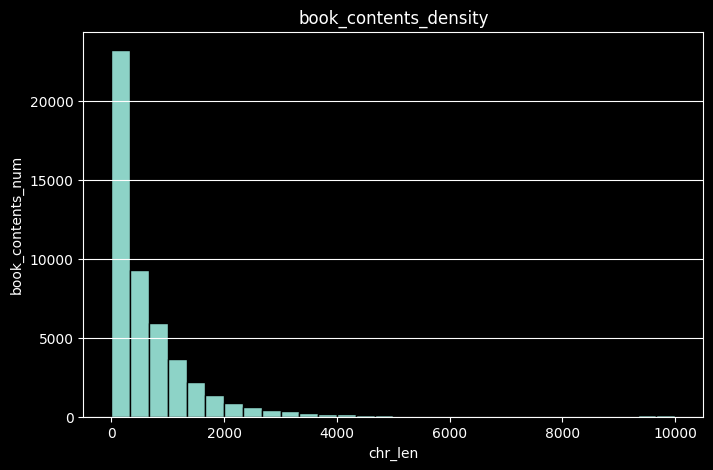

3651


In [ ]:
# 목차 길이 시각화
plt.figure(figsize=(8, 5))
plt.hist(
    mokcha_cleaned.apply(lambda x: len(str(x)) if pd.notna(x) else 0),
    bins=30,
    edgecolor="black",
)
plt.title("book_contents_density")
plt.xlabel("chr_len")
plt.ylabel("book_contents_num")
plt.grid(axis="y")
plt.show()

# 길이 2000 초과 목차 개수 출력
print(mokcha_cleaned[mokcha_cleaned.apply(lambda x: len(str(x))) > 2000].shape[0])

In [137]:
mokcha_cleaned[mokcha_cleaned.apply(lambda x: len(str(x)) > 3500)]

47                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [ ]:
# 결과 확인 (선택)
mokcha_cleaned.head(50).to_frame()

In [ ]:
df["목차"] = df["목차"].apply(clean_mokcha)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49302 entries, 0 to 49340
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ISBN    49301 non-null  float64
 1   분류      48513 non-null  object 
 2   제목      49301 non-null  object 
 3   부제      32750 non-null  object 
 4   저자      49301 non-null  object 
 5   발행자     49301 non-null  object 
 6   발행일     49301 non-null  object 
 7   페이지     49301 non-null  float64
 8   가격      49301 non-null  float64
 9   표지      49301 non-null  object 
 10  책소개     48702 non-null  object 
 11  저자소개    37505 non-null  object 
 12  목차      49302 non-null  object 
 13  출판사리뷰   28952 non-null  object 
 14  추천사     520 non-null    object 
dtypes: float64(3), object(12)
memory usage: 6.0+ MB


In [ ]:
df[df["ISBN"].isna()]
df = df.drop(index=1318).reset_index(drop=True)

In [ ]:
df[df["ISBN"].isna()]

,ISBN,분류,제목,부제,저자,발행자,발행일,페이지,가격,표지,책소개,저자소개,목차,출판사리뷰,추천사


In [ ]:
df["목차"] = df["목차"].replace(r"^\s*$", np.nan, regex=True)

In [ ]:
df.replace(r"^\s*$", np.nan, regex=True, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49301 entries, 0 to 49300
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ISBN    49301 non-null  float64
 1   분류      48513 non-null  object 
 2   제목      49301 non-null  object 
 3   부제      32750 non-null  object 
 4   저자      49301 non-null  object 
 5   발행자     49301 non-null  object 
 6   발행일     49301 non-null  object 
 7   페이지     49301 non-null  float64
 8   가격      49301 non-null  float64
 9   표지      49301 non-null  object 
 10  책소개     48702 non-null  object 
 11  저자소개    37505 non-null  object 
 12  목차      45781 non-null  object 
 13  출판사리뷰   28952 non-null  object 
 14  추천사     520 non-null    object 
dtypes: float64(3), object(12)
memory usage: 5.6+ MB


In [ ]:
df.to_csv(
    r"",
    index=False,
    encoding="utf-8-sig",
)

In [ ]:
pd.reset_option("all")

C:\Users\computer\AppData\Local\Temp\ipykernel_31552\2786130087.py:1: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option('all')
C:\Users\computer\AppData\Local\Temp\ipykernel_31552\2786130087.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


In [ ]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', None)
# data